# NBA EDA

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

pd.set_option('display.max_columns', None)


In [126]:
df = pd.read_csv("/content/2023_nba_player_stats.csv")

In [127]:
df.head()

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,1559,46.6,240,686,35.0,531,622,85.4,78,571,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,1328,54.8,66,200,33.0,661,771,85.7,113,557,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,1449,49.6,185,541,34.2,515,694,74.2,54,515,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,1381,51.0,58,168,34.5,669,739,90.5,59,270,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,1278,55.3,47,171,27.5,498,772,64.5,137,605,742,359,246,52,51,197,3451,46,6,341


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     534 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     539 non-null    int64  
 22  TO

In [129]:
df.describe()

,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,25.970315,48.040816,24.018553,24.022263,1103.617625,523.426716,191.576994,403.005566,46.325232,56.324675,156.148423,31.530612,83.948052,107.384045,71.993506,47.623377,150.630798,198.254174,115.545455,61.300557,33.270872,21.241187,91.181818,1036.938776,4.011132,0.220779,0.000000
std,4.315513,24.650686,14.496366,13.445866,827.765114,498.084360,178.351286,369.595909,10.967271,60.916821,160.950881,13.711120,105.681665,129.692484,21.280275,52.119368,137.336246,181.819962,129.578453,58.279185,28.336745,26.529238,66.206731,894.081896,8.770932,1.564432,148.223909
min,19.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-642.000000
25%,23.000000,30.500000,12.000000,14.000000,329.000000,120.500000,45.500000,93.500000,41.650000,5.000000,17.000000,28.100000,13.500000,18.000000,66.700000,10.000000,36.500000,50.500000,22.000000,14.500000,8.500000,5.000000,32.000000,254.000000,0.000000,0.000000,-70.000000
50%,25.000000,54.000000,25.000000,25.000000,970.200000,374.000000,138.000000,300.000000,45.500000,36.000000,109.000000,34.200000,42.000000,60.000000,76.300000,33.000000,118.000000,159.000000,69.000000,44.000000,28.000000,13.000000,86.000000,810.000000,0.000000,0.000000,-7.000000
75%,29.000000,68.000000,36.000000,34.000000,1845.900000,769.500000,283.500000,598.500000,50.600000,92.000000,249.500000,38.500000,113.500000,147.000000,84.100000,63.000000,229.500000,286.000000,162.500000,92.500000,51.000000,28.000000,140.000000,1646.000000,3.000000,0.000000,57.000000
max,42.000000,83.000000,57.000000,60.000000,2963.200000,2225.000000,728.000000,1559.000000,100.000000,301.000000,731.000000,100.000000,669.000000,772.000000,100.000000,274.000000,744.000000,973.000000,741.000000,300.000000,128.000000,193.000000,279.000000,3842.000000,65.000000,29.000000,640.000000


In [130]:
df.shape

(539, 30)

In [131]:
df.loc[df.isnull().any(axis = 1)]

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
534,Alondes Williams,NaN,BKN,23,1,1,0,5.3,0,0,0,0.0,0,0,0.0,0,0,0.0,0,1,1,0,2,0,0,1,-1,0,0,-5
535,Deonte Burton,NaN,SAC,29,2,1,1,6.5,0,0,2,0.0,0,1,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,5
536,Frank Jackson,NaN,UTA,24,1,0,1,5.0,0,0,3,0.0,0,1,0.0,0,0,0.0,1,1,2,1,0,0,0,0,4,0,0,-2
537,Michael Foster Jr.,NaN,PHI,20,1,1,0,1.0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-2
538,Sterling Brown,NaN,LAL,28,4,2,2,24.4,0,0,4,0.0,0,2,0.0,0,0,0.0,3,5,8,2,0,3,0,4,22,0,0,-4




```
# Performance Metrics:

What are the key performance metrics for SF players? Points per game, assists, rebounds, efficiency ratings?
How does the player perform compared to others in similar roles? Are there any hidden strengths or consistent performances that might be overlooked?

# Versatility:
Does the player have a diverse skill set? Can they score, assist, rebound, and defend effectively?
Are there certain areas where they excel but are undervalued statistically?

# On-Court Impact:
How does the team perform with this player on the court versus when they're off?
Are there advanced metrics like Player Impact Plus-Minus (PIPM) or on-off court differentials that suggest an undervalued impact?


# Comparative Analysis:
How does this player stack up against more recognized players in the same position statistically?
Are there under-the-radar players with similar or better stats who might be overlooked due to team performance, market size, or other factors?


```



In [132]:
df["POS"].unique()

array(['SF', 'C', 'PG', 'PF', 'SG', 'F', 'G', nan], dtype=object)

In [133]:
df = df.loc[df["POS"] == "SF"].reset_index(drop = True)

In [134]:
df.shape

(77, 30)

In [135]:
df.head()

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,1559,46.6,240,686,35.0,531,622,85.4,78,571,649,342,213,78,51,160,3691,31,1,470
1,DeMar DeRozan,SF,CHI,33,74,37,37,2681.6,1816,657,1303,50.4,46,142,32.4,456,523,87.2,34,309,343,377,153,83,36,186,2997,6,0,67
2,Mikal Bridges,SF,BKN,26,83,42,41,2963.2,1671,593,1267,46.8,169,442,38.2,316,353,89.5,79,285,364,273,127,91,61,159,2846,2,0,36
3,LeBron James,SF,LAL,38,55,30,25,1953.9,1590,609,1219,50.0,121,377,32.1,251,327,76.8,65,392,457,375,178,50,32,88,2769,18,2,214
4,Franz Wagner,SF,ORL,21,80,33,47,2608.7,1485,542,1118,48.5,130,360,36.1,271,322,84.2,70,259,329,283,167,77,17,183,2419,2,0,50


In [136]:
df.describe()

,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,27.012987,57.142857,28.727273,28.415584,1395.584416,653.844156,235.350649,506.415584,45.676623,77.688312,211.636364,34.463636,105.454545,131.064935,74.036364,48.714286,173.753247,222.467532,116.363636,64.584416,41.051948,21.818182,106.727273,1219.441558,2.558442,0.142857,2.467532
std,4.044143,20.632572,13.179566,11.907926,788.885573,487.127160,171.503396,361.088062,6.055617,59.187761,153.854418,7.615046,114.081866,133.713297,17.998735,36.377356,110.580425,135.677499,98.145288,49.433994,27.680459,18.363814,56.989989,808.082550,4.935088,0.505608,156.207317
min,21.000000,1.000000,1.000000,0.000000,28.800000,9.000000,3.000000,13.000000,21.400000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,2.000000,17.000000,0.000000,0.000000,-491.000000
25%,24.000000,45.000000,19.000000,22.000000,800.800000,293.000000,110.000000,229.000000,43.300000,30.000000,103.000000,32.200000,28.000000,39.000000,71.700000,23.000000,95.000000,124.000000,44.000000,32.000000,21.000000,10.000000,68.000000,642.000000,0.000000,0.000000,-87.000000
50%,27.000000,63.000000,30.000000,29.000000,1452.600000,562.000000,201.000000,465.000000,45.800000,63.000000,171.000000,35.800000,68.000000,86.000000,76.800000,36.000000,169.000000,223.000000,91.000000,52.000000,36.000000,16.000000,107.000000,1144.000000,1.000000,0.000000,-7.000000
75%,30.000000,74.000000,38.000000,35.000000,2063.300000,1019.000000,354.000000,791.000000,48.800000,123.000000,333.000000,39.400000,129.000000,165.000000,84.700000,65.000000,246.000000,318.000000,152.000000,88.000000,56.000000,30.000000,145.000000,1760.000000,3.000000,0.000000,96.000000
max,38.000000,83.000000,55.000000,53.000000,2963.200000,2225.000000,727.000000,1559.000000,61.500000,240.000000,686.000000,50.000000,531.000000,622.000000,100.000000,179.000000,571.000000,649.000000,377.000000,213.000000,128.000000,93.000000,240.000000,3691.000000,31.000000,3.000000,470.000000


In [137]:
df.rename(columns={
    'PName': 'Player_Name',
    'POS': 'Position',
    'Team': 'Team_Abbreviation',
    'Age': 'Age',
    'GP': 'Games_Played',
    'W': 'Wins',
    'L': 'Losses',
    'Min': 'Minutes_Played',
    'PTS': 'Total_Points',
    'FGM': 'Field_Goals_Made',
    'FGA': 'Field_Goals_Attempted',
    'FG%': 'Field_Goal_Percentage',
    '3PM': 'Three_Point_FG_Made',
    '3PA': 'Three_Point_FG_Attempted',
    '3P%': 'Three_Point_FG_Percentage',
    'FTM': 'Free_Throws_Made',
    'FTA': 'Free_Throws_Attempted',
    'FT%': 'Free_Throw_Percentage',
    'OREB': 'Offensive_Rebounds',
    'DREB': 'Defensive_Rebounds',
    'REB': 'Total_Rebounds',
    'AST': 'Assists',
    'TOV': 'Turnovers',
    'STL': 'Steals',
    'BLK': 'Blocks',
    'PF': 'Personal_Fouls',
    'FP': 'NBA_Fantasy_Points',
    'DD2': 'Double_Doubles',
    'TD3': 'Triple_Doubles',
    '+/-': 'Plus_Minus'
}, inplace=True)

# Univariate Analysis

## Distribution for the key performance metrics for SF players: points, assists, rebounds and age

In [138]:
key_metrics = df[["Age", "Total_Points", 'Field_Goal_Percentage',"Assists", "Total_Rebounds", 'Turnovers', 'Steals', 'Blocks', 'Plus_Minus']]
key_metrics.head()

,Age,Total_Points,Field_Goal_Percentage,Assists,Total_Rebounds,Turnovers,Steals,Blocks,Plus_Minus
0,25,2225,46.6,342,649,213,78,51,470
1,33,1816,50.4,377,343,153,83,36,67
2,26,1671,46.8,273,364,127,91,61,36
3,38,1590,50.0,375,457,178,50,32,214
4,21,1485,48.5,283,329,167,77,17,50


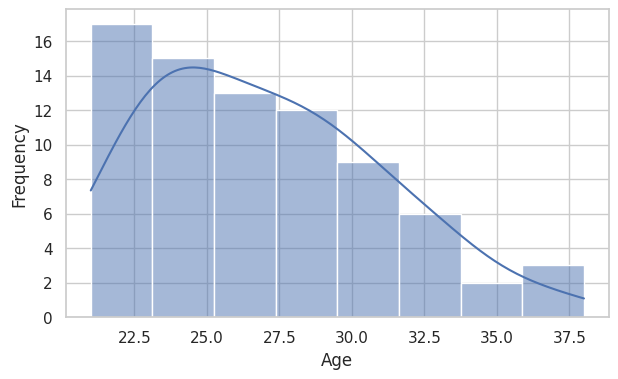

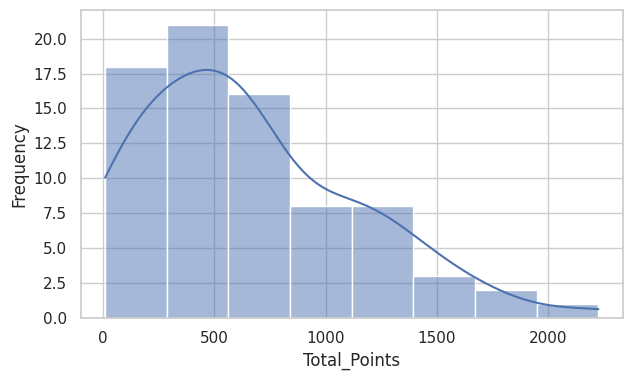

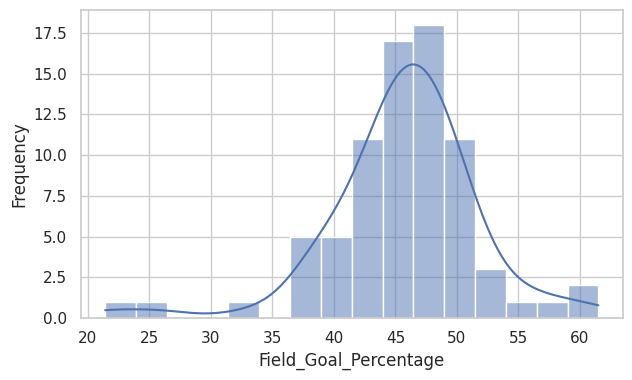

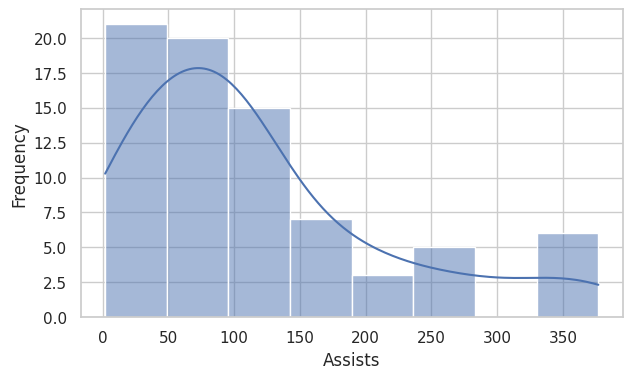

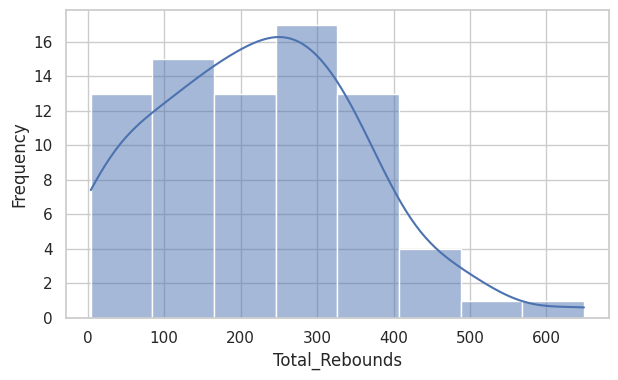

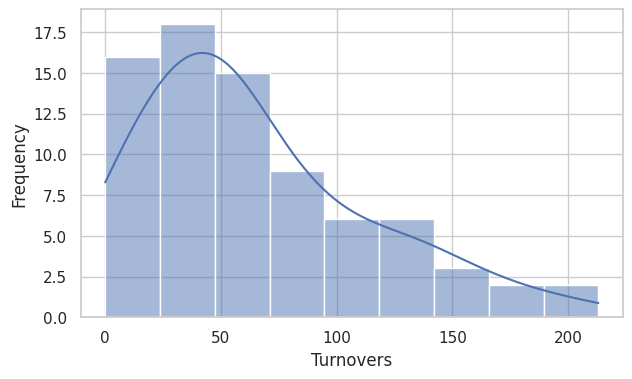

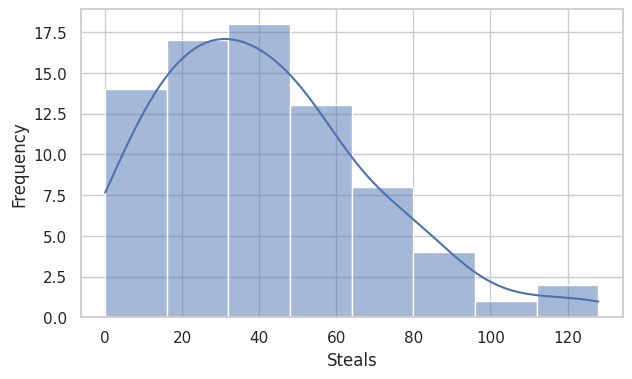

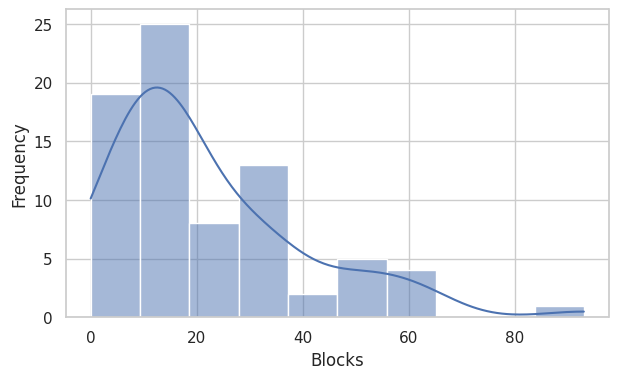

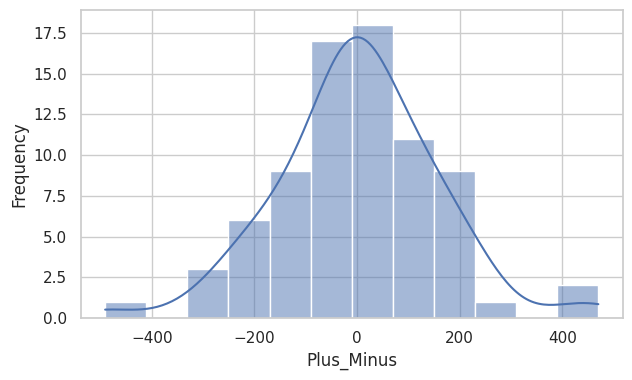

In [139]:
for col in key_metrics.columns:
  plt.figure(figsize = (7,4))
  sns.histplot(df[col], kde = True)
  plt.xlabel(f"{col}")
  plt.ylabel("Frequency")
  plt.show()

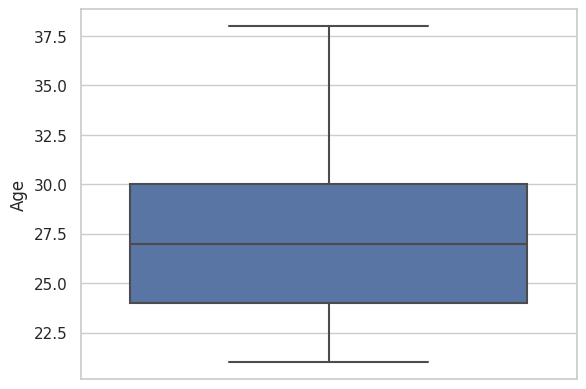

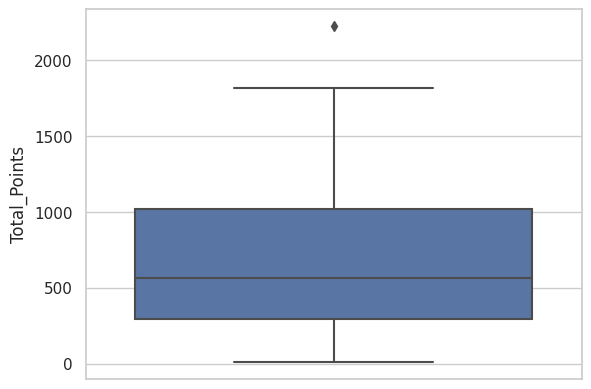

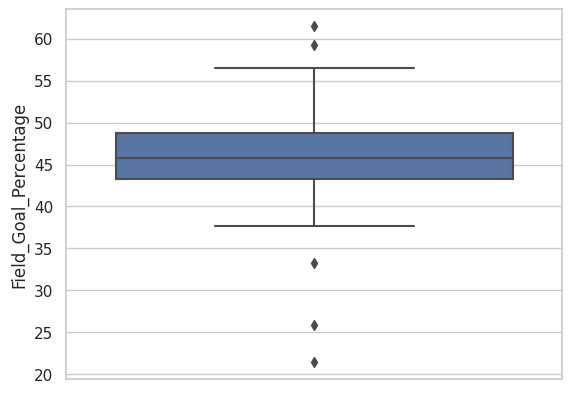

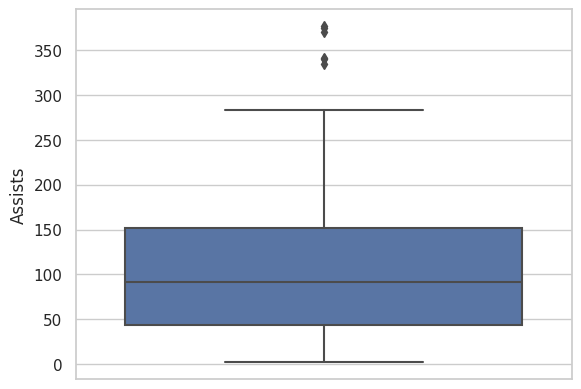

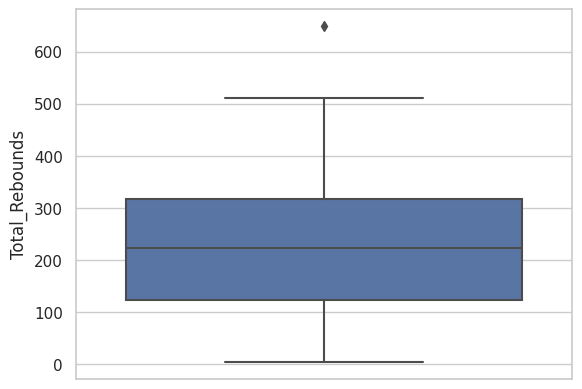

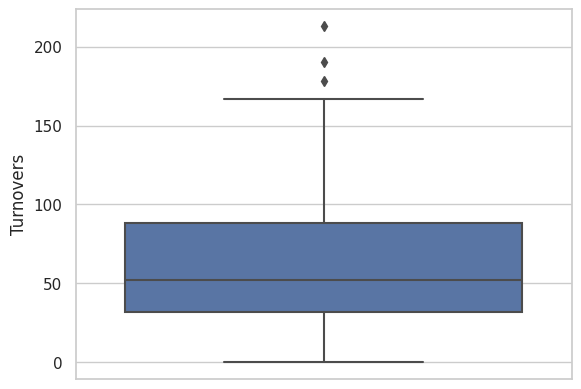

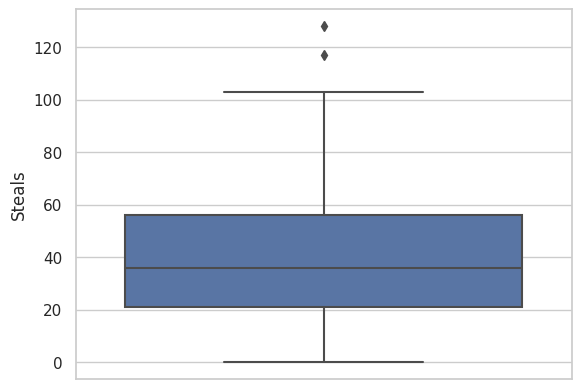

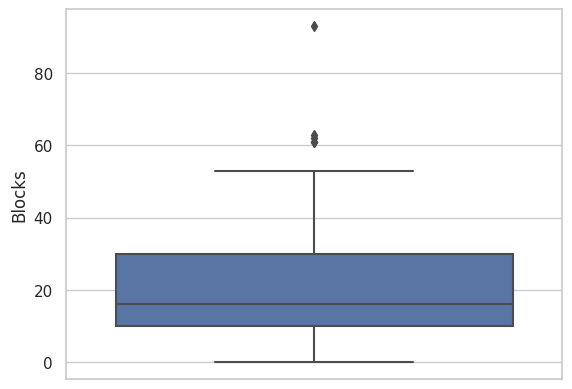

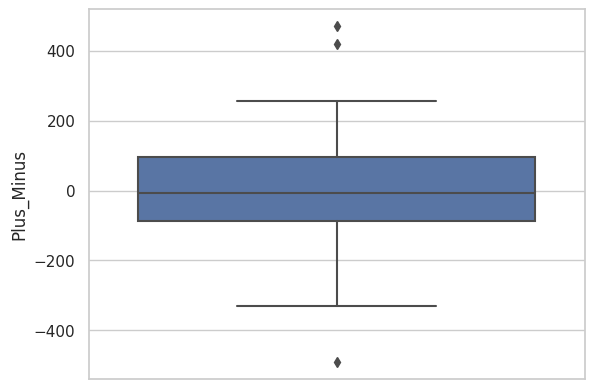

In [140]:
for col in key_metrics.columns:
  plt.figure()
  sns.boxplot(y = col, data = df)
  plt.show()

### Locate the essential outliers in the key metrics

In [141]:
key_metrics.columns

Index(['Age', 'Total_Points', 'Field_Goal_Percentage', 'Assists',
       'Total_Rebounds', 'Turnovers', 'Steals', 'Blocks', 'Plus_Minus'],
      dtype='object')

In [142]:
def outlier_detection(var_name):

  sf_var = df[var_name]

  q1_var = sf_var.quantile(0.25)
  q3_var = sf_var.quantile(0.75)
  IQR_var = q3_var - q1_var

  lower_bound = q1_var - 1.5 * IQR_var
  upper_bound = q1_var + 1.5 * IQR_var

  # outliers = df[(sf_var < lower_bound) | (sf_var > upper_bound)]
  outliers = df[(sf_var > upper_bound)].sort_values(by = var_name, ascending = False)


  return outliers

In [143]:
outlier_detection("Total_Points")

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,1559,46.6,240,686,35.0,531,622,85.4,78,571,649,342,213,78,51,160,3691,31,1,470
1,DeMar DeRozan,SF,CHI,33,74,37,37,2681.6,1816,657,1303,50.4,46,142,32.4,456,523,87.2,34,309,343,377,153,83,36,186,2997,6,0,67
2,Mikal Bridges,SF,BKN,26,83,42,41,2963.2,1671,593,1267,46.8,169,442,38.2,316,353,89.5,79,285,364,273,127,91,61,159,2846,2,0,36
3,LeBron James,SF,LAL,38,55,30,25,1953.9,1590,609,1219,50.0,121,377,32.1,251,327,76.8,65,392,457,375,178,50,32,88,2769,18,2,214
4,Franz Wagner,SF,ORL,21,80,33,47,2608.7,1485,542,1118,48.5,130,360,36.1,271,322,84.2,70,259,329,283,167,77,17,183,2419,2,0,50
5,Jimmy Butler,SF,MIA,33,64,35,29,2138.0,1466,479,888,53.9,36,103,35.0,472,555,85.0,141,234,375,340,101,117,21,80,2739,11,0,47
6,Keldon Johnson,SF,SAS,23,63,17,46,2063.3,1385,503,1113,45.2,134,407,32.9,245,327,74.9,56,262,318,183,134,46,11,125,2078,5,0,-491


In [144]:
outlier_detection('Field_Goal_Percentage')

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
74,Louis King,SF,PHI,24,1,1,0,28.8,20,8,13,61.5,4,8,50.0,0,1,0.0,2,2,4,2,2,1,0,4,29,0,0,2
58,Paul Reed,SF,PHI,23,69,44,25,755.2,287,124,209,59.3,1,6,16.7,38,51,74.5,112,150,262,27,45,45,51,123,885,5,0,-17
64,Javonte Green,SF,CHI,29,32,13,19,480.3,165,61,108,56.5,13,35,37.1,30,45,66.7,27,61,88,23,20,24,21,52,420,0,0,48
46,Isaiah Jackson,SF,IND,21,63,24,39,1042.3,455,179,318,56.3,2,14,14.3,95,146,65.1,113,169,282,51,51,31,93,154,1191,5,0,-124
5,Jimmy Butler,SF,MIA,33,64,35,29,2138.0,1466,479,888,53.9,36,103,35.0,472,555,85.0,141,234,375,340,101,117,21,80,2739,11,0,47
63,Stanley Johnson,SF,SAS,26,30,5,25,469.5,174,65,122,53.3,18,40,45.0,26,39,66.7,22,73,95,67,33,16,6,48,422,0,0,-92
47,Kenrich Williams,SF,OKC,28,53,26,27,1206.0,425,179,346,51.7,50,134,37.3,17,39,43.6,97,164,261,105,32,45,14,112,1041,2,0,75


In [145]:
outlier_detection('Assists')

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
1,DeMar DeRozan,SF,CHI,33,74,37,37,2681.6,1816,657,1303,50.4,46,142,32.4,456,523,87.2,34,309,343,377,153,83,36,186,2997,6,0,67
3,LeBron James,SF,LAL,38,55,30,25,1953.9,1590,609,1219,50.0,121,377,32.1,251,327,76.8,65,392,457,375,178,50,32,88,2769,18,2,214
12,Scottie Barnes,SF,TOR,21,77,38,39,2677.6,1179,463,1016,45.6,63,224,28.1,190,246,77.2,179,333,512,371,154,83,61,170,2628,15,1,175
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,1559,46.6,240,686,35.0,531,622,85.4,78,571,649,342,213,78,51,160,3691,31,1,470
5,Jimmy Butler,SF,MIA,33,64,35,29,2138.0,1466,479,888,53.9,36,103,35.0,472,555,85.0,141,234,375,340,101,117,21,80,2739,11,0,47
34,Kyle Anderson,SF,MIN,29,69,36,33,1956.6,647,252,495,50.9,43,105,41.0,100,136,73.5,66,302,368,335,103,78,63,146,1911,10,3,91
4,Franz Wagner,SF,ORL,21,80,33,47,2608.7,1485,542,1118,48.5,130,360,36.1,271,322,84.2,70,259,329,283,167,77,17,183,2419,2,0,50
2,Mikal Bridges,SF,BKN,26,83,42,41,2963.2,1671,593,1267,46.8,169,442,38.2,316,353,89.5,79,285,364,273,127,91,61,159,2846,2,0,36
21,Bruce Brown,SF,DEN,26,80,53,27,2279.5,923,358,741,48.3,91,254,35.8,116,153,75.8,63,265,328,268,123,87,51,190,2010,3,1,31
14,Brandon Ingram,SF,NOP,25,45,23,22,1538.1,1112,404,835,48.4,64,164,39.0,240,272,88.2,23,223,246,262,148,32,19,116,1805,6,2,96


In [146]:
outlier_detection('Total_Rebounds')

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,1559,46.6,240,686,35.0,531,622,85.4,78,571,649,342,213,78,51,160,3691,31,1,470
12,Scottie Barnes,SF,TOR,21,77,38,39,2677.6,1179,463,1016,45.6,63,224,28.1,190,246,77.2,179,333,512,371,154,83,61,170,2628,15,1,175
27,Deni Avdija,SF,WAS,22,76,33,43,2020.4,697,253,579,43.7,69,232,29.7,122,165,73.9,74,413,487,211,123,65,29,209,1757,11,0,-51
7,Kyle Kuzma,SF,WAS,27,64,29,35,2238.9,1357,512,1142,44.8,160,481,33.3,173,237,73.0,55,408,463,239,190,36,29,145,2276,14,1,10
3,LeBron James,SF,LAL,38,55,30,25,1953.9,1590,609,1219,50.0,121,377,32.1,251,327,76.8,65,392,457,375,178,50,32,88,2769,18,2,214
37,Torrey Craig,SF,PHX,32,79,44,35,1947.8,588,228,500,45.6,100,253,39.5,32,45,71.1,145,281,426,117,73,50,62,179,1538,4,0,-177


In [147]:
outlier_detection('Turnovers')

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,1559,46.6,240,686,35.0,531,622,85.4,78,571,649,342,213,78,51,160,3691,31,1,470
7,Kyle Kuzma,SF,WAS,27,64,29,35,2238.9,1357,512,1142,44.8,160,481,33.3,173,237,73.0,55,408,463,239,190,36,29,145,2276,14,1,10
3,LeBron James,SF,LAL,38,55,30,25,1953.9,1590,609,1219,50.0,121,377,32.1,251,327,76.8,65,392,457,375,178,50,32,88,2769,18,2,214
4,Franz Wagner,SF,ORL,21,80,33,47,2608.7,1485,542,1118,48.5,130,360,36.1,271,322,84.2,70,259,329,283,167,77,17,183,2419,2,0,50
12,Scottie Barnes,SF,TOR,21,77,38,39,2677.6,1179,463,1016,45.6,63,224,28.1,190,246,77.2,179,333,512,371,154,83,61,170,2628,15,1,175
1,DeMar DeRozan,SF,CHI,33,74,37,37,2681.6,1816,657,1303,50.4,46,142,32.4,456,523,87.2,34,309,343,377,153,83,36,186,2997,6,0,67
14,Brandon Ingram,SF,NOP,25,45,23,22,1538.1,1112,404,835,48.4,64,164,39.0,240,272,88.2,23,223,246,262,148,32,19,116,1805,6,2,96
9,Bojan Bogdanovic,SF,DET,34,59,15,44,1892.9,1273,430,882,48.8,145,353,41.1,268,303,88.4,36,187,223,152,135,34,8,113,1760,0,0,-330
6,Keldon Johnson,SF,SAS,23,63,17,46,2063.3,1385,503,1113,45.2,134,407,32.9,245,327,74.9,56,262,318,183,134,46,11,125,2078,5,0,-491
13,O.G. Anunoby,SF,TOR,25,67,33,34,2385.7,1124,421,885,47.6,142,367,38.7,140,167,83.8,95,237,332,131,132,128,50,200,2121,2,0,132


In [148]:
outlier_detection('Steals')

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
13,O.G. Anunoby,SF,TOR,25,67,33,34,2385.7,1124,421,885,47.6,142,367,38.7,140,167,83.8,95,237,332,131,132,128,50,200,2121,2,0,132
5,Jimmy Butler,SF,MIA,33,64,35,29,2138.0,1466,479,888,53.9,36,103,35.0,472,555,85.0,141,234,375,340,101,117,21,80,2739,11,0,47
32,Herbert Jones,SF,NOP,24,66,31,35,1950.5,649,235,501,46.9,56,167,33.5,123,161,76.4,97,172,269,162,88,103,42,208,1562,0,0,150
2,Mikal Bridges,SF,BKN,26,83,42,41,2963.2,1671,593,1267,46.8,169,442,38.2,316,353,89.5,79,285,364,273,127,91,61,159,2846,2,0,36
21,Bruce Brown,SF,DEN,26,80,53,27,2279.5,923,358,741,48.3,91,254,35.8,116,153,75.8,63,265,328,268,123,87,51,190,2010,3,1,31
1,DeMar DeRozan,SF,CHI,33,74,37,37,2681.6,1816,657,1303,50.4,46,142,32.4,456,523,87.2,34,309,343,377,153,83,36,186,2997,6,0,67
12,Scottie Barnes,SF,TOR,21,77,38,39,2677.6,1179,463,1016,45.6,63,224,28.1,190,246,77.2,179,333,512,371,154,83,61,170,2628,15,1,175
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,1559,46.6,240,686,35.0,531,622,85.4,78,571,649,342,213,78,51,160,3691,31,1,470
34,Kyle Anderson,SF,MIN,29,69,36,33,1956.6,647,252,495,50.9,43,105,41.0,100,136,73.5,66,302,368,335,103,78,63,146,1911,10,3,91
4,Franz Wagner,SF,ORL,21,80,33,47,2608.7,1485,542,1118,48.5,130,360,36.1,271,322,84.2,70,259,329,283,167,77,17,183,2419,2,0,50


In [149]:
outlier_detection('Blocks')

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
46,Isaiah Jackson,SF,IND,21,63,24,39,1042.3,455,179,318,56.3,2,14,14.3,95,146,65.1,113,169,282,51,51,31,93,154,1191,5,0,-124
34,Kyle Anderson,SF,MIN,29,69,36,33,1956.6,647,252,495,50.9,43,105,41.0,100,136,73.5,66,302,368,335,103,78,63,146,1911,10,3,91
37,Torrey Craig,SF,PHX,32,79,44,35,1947.8,588,228,500,45.6,100,253,39.5,32,45,71.1,145,281,426,117,73,50,62,179,1538,4,0,-177
2,Mikal Bridges,SF,BKN,26,83,42,41,2963.2,1671,593,1267,46.8,169,442,38.2,316,353,89.5,79,285,364,273,127,91,61,159,2846,2,0,36
12,Scottie Barnes,SF,TOR,21,77,38,39,2677.6,1179,463,1016,45.6,63,224,28.1,190,246,77.2,179,333,512,371,154,83,61,170,2628,15,1,175
8,Jerami Grant,SF,POR,29,63,28,35,2245.5,1290,434,913,47.5,144,359,40.1,278,342,81.3,53,230,283,150,116,51,53,152,2051,2,0,-35
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,1559,46.6,240,686,35.0,531,622,85.4,78,571,649,342,213,78,51,160,3691,31,1,470
21,Bruce Brown,SF,DEN,26,80,53,27,2279.5,923,358,741,48.3,91,254,35.8,116,153,75.8,63,265,328,268,123,87,51,190,2010,3,1,31
58,Paul Reed,SF,PHI,23,69,44,25,755.2,287,124,209,59.3,1,6,16.7,38,51,74.5,112,150,262,27,45,45,51,123,885,5,0,-17
13,O.G. Anunoby,SF,TOR,25,67,33,34,2385.7,1124,421,885,47.6,142,367,38.7,140,167,83.8,95,237,332,131,132,128,50,200,2121,2,0,132


In [150]:
outlier_detection('Plus_Minus')

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,1559,46.6,240,686,35.0,531,622,85.4,78,571,649,342,213,78,51,160,3691,31,1,470
15,Michael Porter Jr.,SF,DEN,24,62,41,21,1797.9,1080,398,817,48.7,188,454,41.4,96,120,80.0,64,277,341,65,68,37,29,119,1717,3,0,418
11,Harrison Barnes,SF,SAC,30,82,48,34,2662.0,1230,374,791,47.3,132,353,37.4,350,413,84.7,87,279,366,128,86,57,10,103,1976,0,0,255
29,Cedi Osman,SF,CLE,28,77,48,29,1548.3,669,239,530,45.1,116,312,37.2,75,108,69.4,25,151,176,115,52,35,11,122,1139,1,0,228
10,Kawhi Leonard,SF,LAC,31,52,33,19,1747.5,1239,446,871,51.2,104,250,41.6,243,279,87.1,57,281,338,204,88,72,28,84,2163,4,0,220
43,Sam Hauser,SF,BOS,25,80,55,25,1289.9,512,180,396,45.5,140,335,41.8,12,17,70.6,35,169,204,71,30,29,21,99,983,0,0,219
3,LeBron James,SF,LAL,38,55,30,25,1953.9,1590,609,1219,50.0,121,377,32.1,251,327,76.8,65,392,457,375,178,50,32,88,2769,18,2,214
17,Dillon Brooks,SF,MEM,27,73,46,27,2214.3,1047,392,991,39.6,143,439,32.6,120,154,77.9,45,199,244,189,104,65,16,240,1762,0,0,205


#Bivariate Analysis

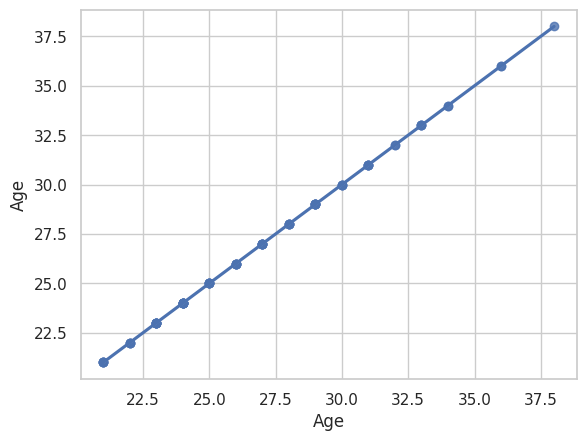

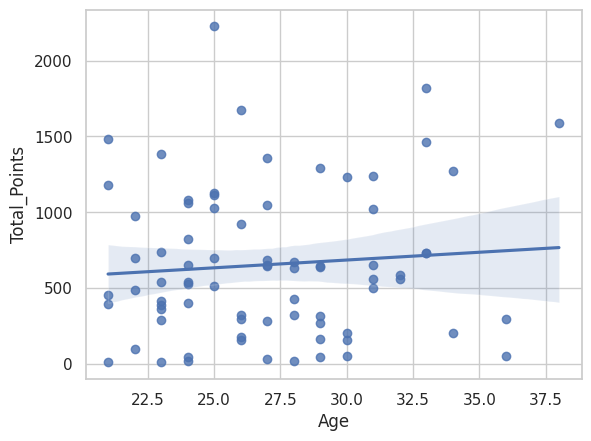

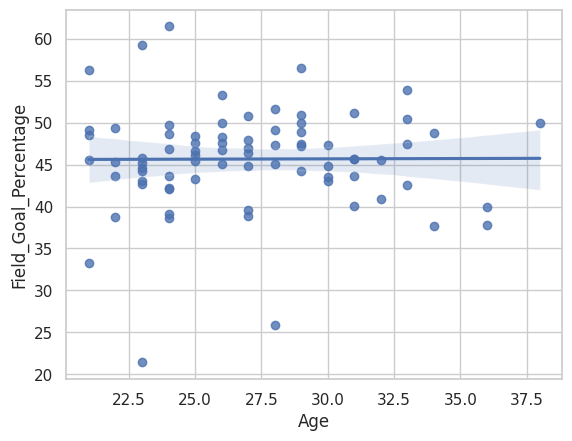

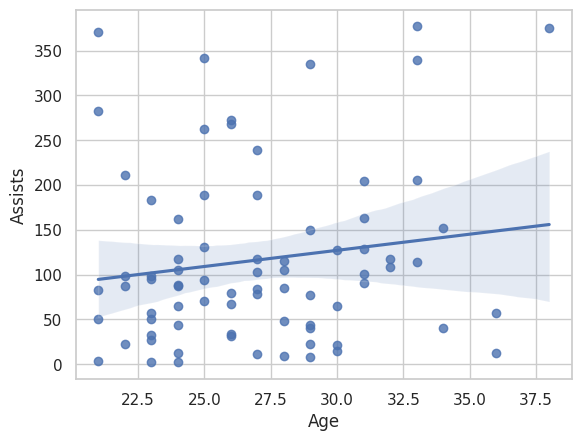

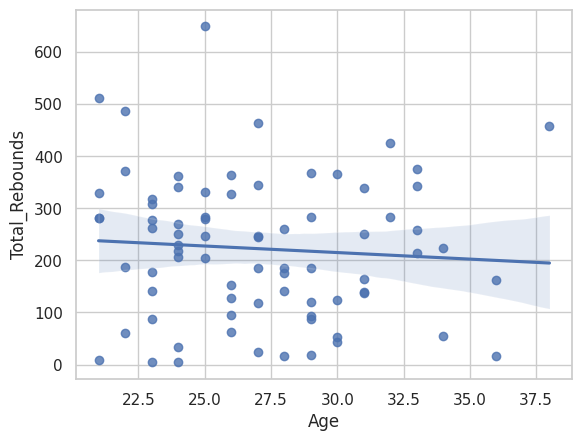

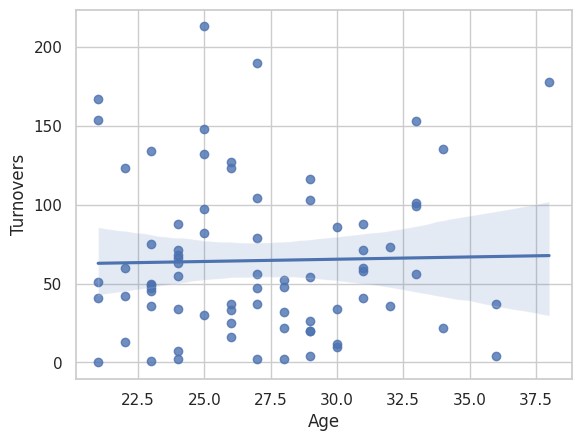

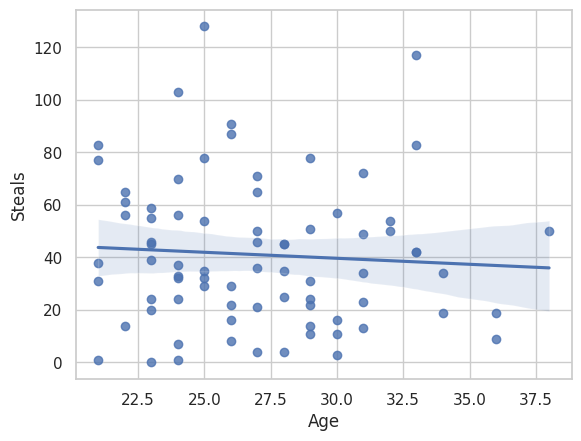

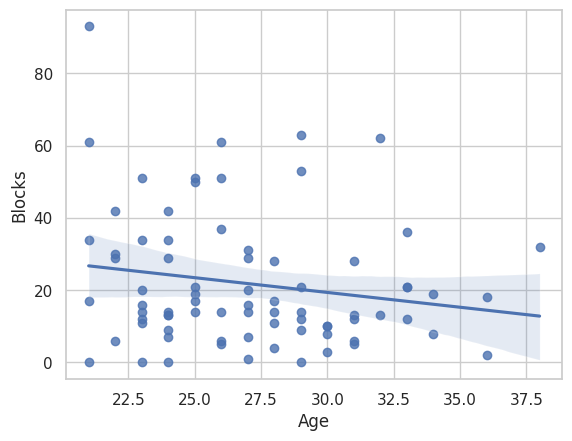

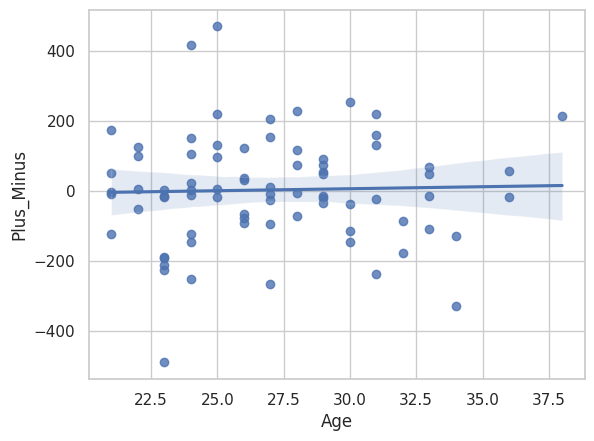

In [151]:
for col in key_metrics.columns:
  plt.figure()
  ax = sns.regplot(data=df, x='Age', y= col)
  plt.ylabel(col)
  plt.xlabel("Age")
  plt.show()

In [152]:
top_10_minutes = df.nlargest(10, 'Minutes_Played')
bottom_10_minutes = df.nsmallest(10, 'Minutes_Played')

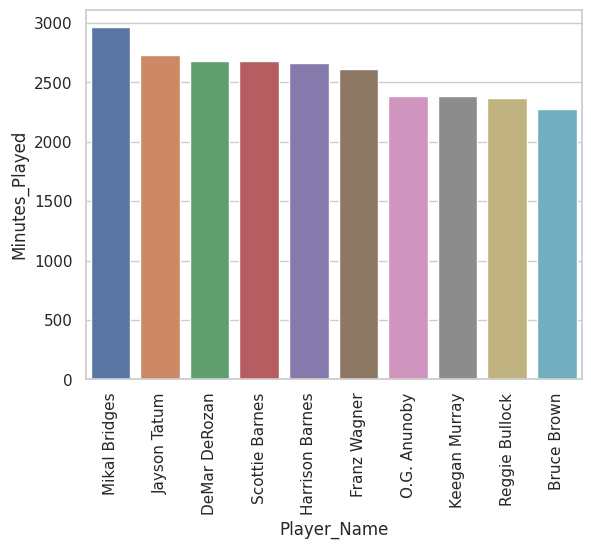

In [153]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Player_Name", y=top_10_minutes["Minutes_Played"], data = top_10_minutes)
plt.xticks(rotation = 90)
plt.show()

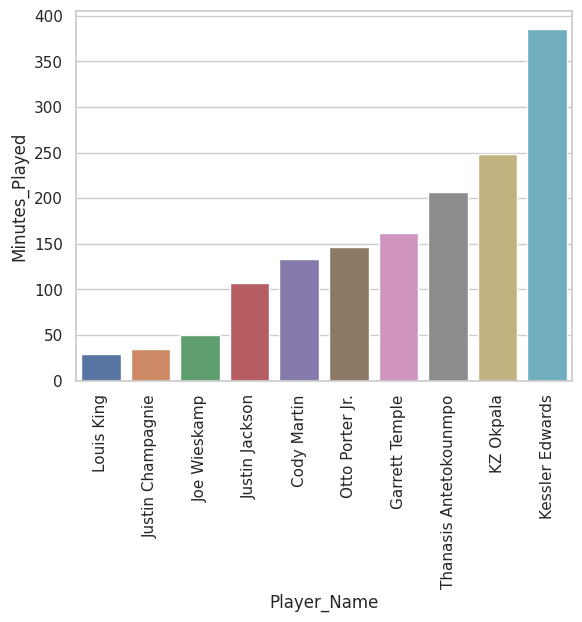

In [154]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Player_Name", y=bottom_10_minutes["Minutes_Played"], data = bottom_10_minutes)
plt.xticks(rotation = 90)
plt.show()

In [155]:
bottom_10_minutes

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
74,Louis King,SF,PHI,24,1,1,0,28.8,20,8,13,61.5,4,8,50.0,0,1,0.0,2,2,4,2,2,1,0,4,29,0,0,2
75,Justin Champagnie,SF,BOS,21,5,4,1,34.3,11,5,15,33.3,1,5,20.0,0,0,0.0,3,5,8,4,0,1,0,2,30,0,0,-4
76,Joe Wieskamp,SF,TOR,23,9,6,3,49.7,9,3,14,21.4,3,12,25.0,0,0,0.0,0,4,4,3,1,0,0,3,17,0,0,2
73,Justin Jackson,SF,BOS,28,23,15,8,107.4,20,7,27,25.9,5,20,25.0,1,2,50.0,2,15,17,9,2,4,4,7,76,0,0,-71
72,Cody Martin,SF,CHA,27,7,2,5,133.7,35,14,36,38.9,3,14,21.4,4,7,57.1,8,16,24,11,2,4,1,13,93,0,0,-26
71,Otto Porter Jr.,SF,TOR,29,8,4,4,146.3,44,15,30,50.0,6,17,35.3,8,8,100.0,6,13,19,8,4,11,0,7,108,0,0,-21
69,Garrett Temple,SF,NOP,36,25,16,9,161.8,50,18,45,40.0,11,26,42.3,3,4,75.0,5,12,17,13,4,9,2,15,119,0,0,-17
68,Thanasis Antetokounmpo,SF,MIL,30,37,25,12,206.2,51,20,46,43.5,0,8,0.0,11,22,50.0,15,29,44,15,12,3,3,22,132,0,0,-114
70,KZ Okpala,SF,SAC,24,35,19,16,248.0,46,16,38,42.1,7,21,33.3,7,8,87.5,7,27,34,13,7,7,7,39,141,0,0,-11
67,Kessler Edwards,SF,SAC,22,36,17,19,385.8,100,36,93,38.7,17,55,30.9,11,15,73.3,23,38,61,23,13,14,6,40,255,0,0,5


In [156]:
new_df = df.loc[(df["Minutes_Played"] > 500) & (df["Minutes_Played"] < 1500)].reset_index(drop= True)

In [157]:
new_df.head()

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
0,Doug McDermott,SF,SAS,31,64,19,45,1314.2,654,239,523,45.7,123,298,41.3,53,70,75.7,23,115,138,91,58,13,6,118,955,0,0,-237
1,Cameron Johnson,SF,BKN,27,42,25,17,1199.8,650,223,474,47.0,103,255,40.4,101,120,84.2,34,151,185,78,37,50,14,83,1144,1,0,155
2,Keita Bates-Diop,SF,SAS,27,67,18,49,1452.6,647,236,465,50.8,56,142,39.4,119,150,79.3,65,182,247,103,56,46,20,63,1240,0,0,-266
3,Andrew Wiggins,SF,GSW,28,37,19,18,1190.3,633,250,529,47.3,89,225,39.6,44,72,61.1,61,125,186,85,48,45,28,107,1155,3,0,118
4,Jordan Nwora,SF,IND,24,62,36,26,1188.1,542,194,445,43.6,86,211,40.8,68,86,79.1,51,178,229,88,66,24,14,74,997,1,0,-252


In [158]:
new_key_metrics = new_df[["Age", "Total_Points", 'Field_Goal_Percentage',"Assists", "Total_Rebounds", 'Turnovers', 'Steals', 'Blocks', 'Plus_Minus']]
new_key_metrics.head()

,Age,Total_Points,Field_Goal_Percentage,Assists,Total_Rebounds,Turnovers,Steals,Blocks,Plus_Minus
0,31,654,45.7,91,138,58,13,6,-237
1,27,650,47.0,78,185,37,50,14,155
2,27,647,50.8,103,247,56,46,20,-266
3,28,633,47.3,85,186,48,45,28,118
4,24,542,43.6,88,229,66,24,14,-252


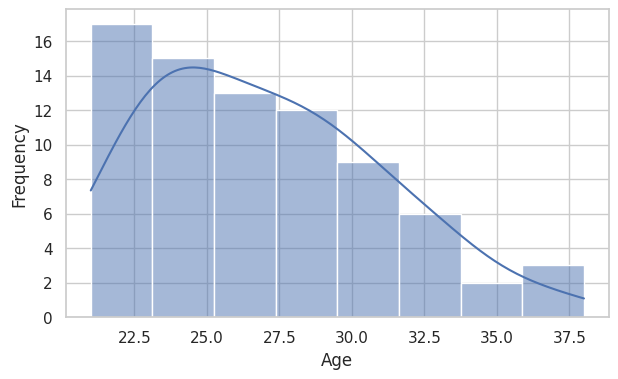

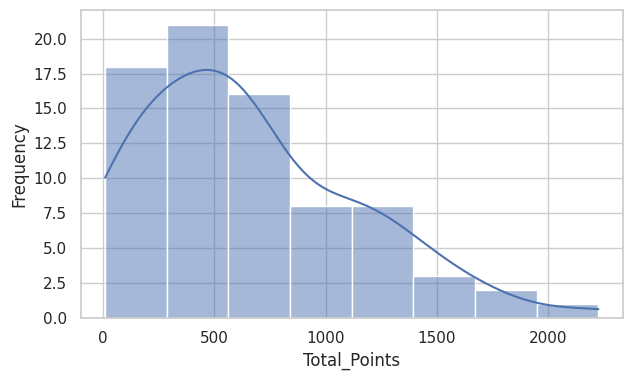

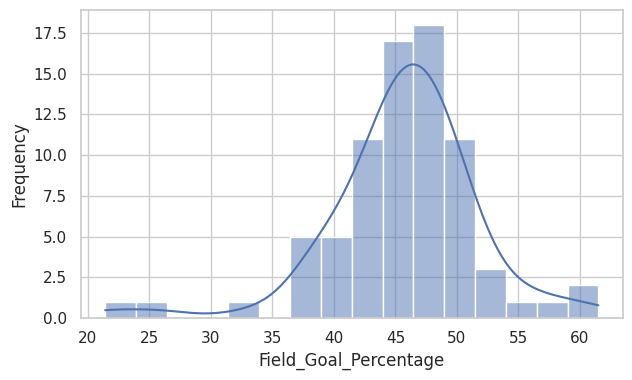

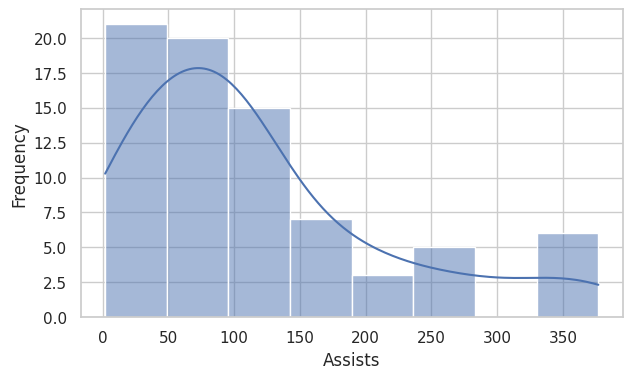

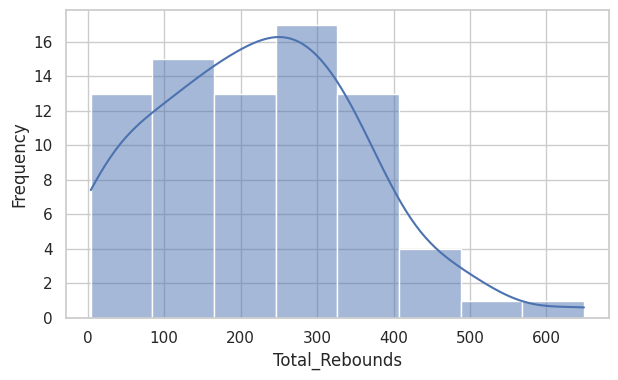

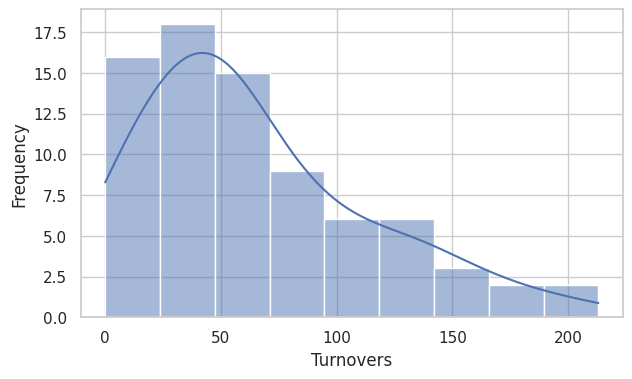

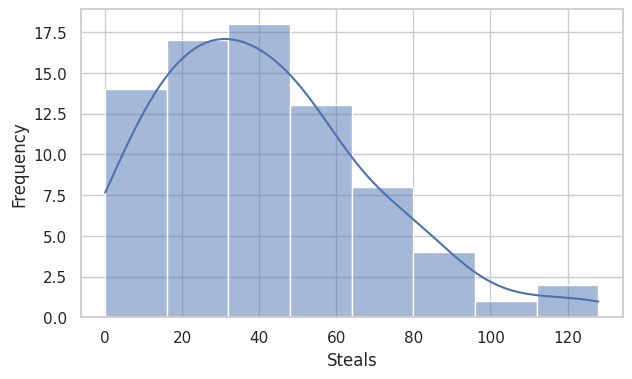

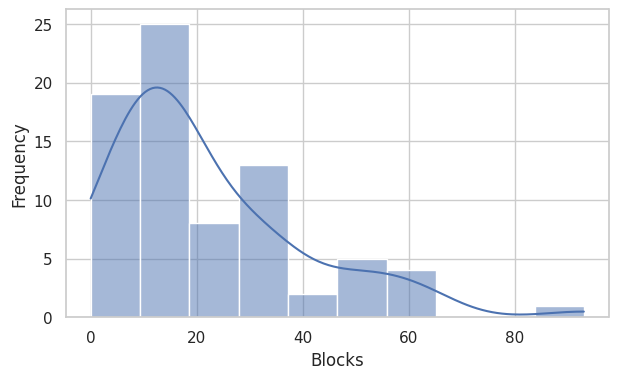

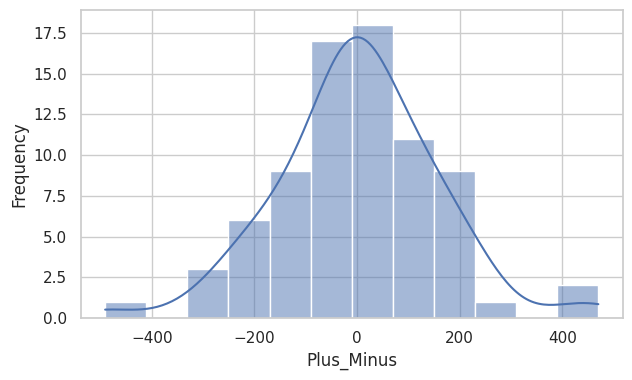

In [159]:
for col in new_key_metrics.columns:
  plt.figure(figsize = (7,4))
  sns.histplot(df[col], kde = True)
  plt.xlabel(f"{col}")
  plt.ylabel("Frequency")
  plt.show()

In [160]:
def new_outlier_detection(var_name):

  sf_var = new_df[var_name]

  q1_var = sf_var.quantile(0.25)
  q3_var = sf_var.quantile(0.75)
  IQR_var = q3_var - q1_var

  lower_bound = q1_var - 1.5 * IQR_var
  upper_bound = q1_var + 1.5 * IQR_var

  # outliers = df[(sf_var < lower_bound) | (sf_var > upper_bound)]
  outliers = new_df[(sf_var > upper_bound)].sort_values(by = var_name, ascending = False)


  return outliers

In [161]:
new_outlier_detection("Total_Points")

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
0,Doug McDermott,SF,SAS,31,64,19,45,1314.2,654,239,523,45.7,123,298,41.3,53,70,75.7,23,115,138,91,58,13,6,118,955,0,0,-237
1,Cameron Johnson,SF,BKN,27,42,25,17,1199.8,650,223,474,47.0,103,255,40.4,101,120,84.2,34,151,185,78,37,50,14,83,1144,1,0,155
2,Keita Bates-Diop,SF,SAS,27,67,18,49,1452.6,647,236,465,50.8,56,142,39.4,119,150,79.3,65,182,247,103,56,46,20,63,1240,0,0,-266
3,Andrew Wiggins,SF,GSW,28,37,19,18,1190.3,633,250,529,47.3,89,225,39.6,44,72,61.1,61,125,186,85,48,45,28,107,1155,3,0,118


In [162]:
new_outlier_detection('Field_Goal_Percentage')

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
20,Paul Reed,SF,PHI,23,69,44,25,755.2,287,124,209,59.3,1,6,16.7,38,51,74.5,112,150,262,27,45,45,51,123,885,5,0,-17
8,Isaiah Jackson,SF,IND,21,63,24,39,1042.3,455,179,318,56.3,2,14,14.3,95,146,65.1,113,169,282,51,51,31,93,154,1191,5,0,-124
9,Kenrich Williams,SF,OKC,28,53,26,27,1206.0,425,179,346,51.7,50,134,37.3,17,39,43.6,97,164,261,105,32,45,14,112,1041,2,0,75


In [163]:
new_outlier_detection('Assists')

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
7,Khris Middleton,SF,MIL,31,33,25,8,800.8,497,177,406,43.6,51,162,31.5,92,102,90.2,28,112,140,163,71,23,5,68,923,4,0,132


In [164]:
new_outlier_detection("Total_Rebounds")

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
8,Isaiah Jackson,SF,IND,21,63,24,39,1042.3,455,179,318,56.3,2,14,14.3,95,146,65.1,113,169,282,51,51,31,93,154,1191,5,0,-124
12,Jalen Johnson,SF,ATL,21,70,35,35,1041.6,395,158,322,49.1,30,104,28.8,49,78,62.8,51,231,282,83,41,38,34,113,1033,1,0,-10


In [165]:
new_outlier_detection('Steals')

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
5,Josh Okogie,SF,PHX,24,72,38,34,1350.6,529,162,414,39.1,66,197,33.5,139,192,72.4,109,142,251,105,63,56,34,114,1195,2,0,106
1,Cameron Johnson,SF,BKN,27,42,25,17,1199.8,650,223,474,47.0,103,255,40.4,101,120,84.2,34,151,185,78,37,50,14,83,1144,1,0,155


In [166]:
new_outlier_detection('Blocks')

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
8,Isaiah Jackson,SF,IND,21,63,24,39,1042.3,455,179,318,56.3,2,14,14.3,95,146,65.1,113,169,282,51,51,31,93,154,1191,5,0,-124
20,Paul Reed,SF,PHI,23,69,44,25,755.2,287,124,209,59.3,1,6,16.7,38,51,74.5,112,150,262,27,45,45,51,123,885,5,0,-17
16,Derrick Jones Jr.,SF,CHI,26,64,29,35,893.4,319,115,230,50.0,27,80,33.8,62,84,73.8,60,93,153,34,25,29,37,86,727,0,0,122
5,Josh Okogie,SF,PHX,24,72,38,34,1350.6,529,162,414,39.1,66,197,33.5,139,192,72.4,109,142,251,105,63,56,34,114,1195,2,0,106
12,Jalen Johnson,SF,ATL,21,70,35,35,1041.6,395,158,322,49.1,30,104,28.8,49,78,62.8,51,231,282,83,41,38,34,113,1033,1,0,-10
3,Andrew Wiggins,SF,GSW,28,37,19,18,1190.3,633,250,529,47.3,89,225,39.6,44,72,61.1,61,125,186,85,48,45,28,107,1155,3,0,118


In [167]:
new_outlier_detection('Plus_Minus')

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
6,Sam Hauser,SF,BOS,25,80,55,25,1289.9,512,180,396,45.5,140,335,41.8,12,17,70.6,35,169,204,71,30,29,21,99,983,0,0,219


# Comparing Sam Hauser to players that had more minutes

In [168]:
df_thirteenk_MP = df.loc[df["Minutes_Played"] > 1300]

In [169]:
df_thirteenk_MP.loc[df_thirteenk_MP["Total_Points"] < 512]

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
45,Isaac Okoro,SF,CLE,22,76,48,28,1652.6,490,175,354,49.4,62,171,36.3,78,103,75.7,52,135,187,87,42,56,30,158,1061,0,0,126


In [170]:
df_thirteenk_MP.loc[(df_thirteenk_MP["Field_Goal_Percentage"] < 45.5)]

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
6,Keldon Johnson,SF,SAS,23,63,17,46,2063.3,1385,503,1113,45.2,134,407,32.9,245,327,74.9,56,262,318,183,134,46,11,125,2078,5,0,-491
7,Kyle Kuzma,SF,WAS,27,64,29,35,2238.9,1357,512,1142,44.8,160,481,33.3,173,237,73.0,55,408,463,239,190,36,29,145,2276,14,1,10
16,Saddiq Bey,SF,ATL,24,77,24,53,2128.7,1062,353,836,42.2,151,418,36.1,205,238,86.1,98,264,362,118,71,70,13,123,1851,4,0,-147
17,Dillon Brooks,SF,MEM,27,73,46,27,2214.3,1047,392,991,39.6,143,439,32.6,120,154,77.9,45,199,244,189,104,65,16,240,1762,0,0,205
19,Tim Hardaway Jr.,SF,DAL,31,71,37,34,2152.2,1019,340,847,40.1,212,550,38.5,127,165,77.0,21,230,251,129,60,49,12,120,1637,0,0,160
20,Keegan Murray,SF,SAC,22,80,47,33,2381.7,976,354,782,45.3,206,501,41.1,62,81,76.5,89,282,371,98,60,61,42,162,1817,4,0,99
23,Aaron Nesmith,SF,IND,23,73,30,43,1816.4,738,252,590,42.7,115,314,36.6,119,142,83.8,62,215,277,98,75,55,34,235,1409,1,0,-211
25,Marcus Morris Sr.,SF,LAC,33,65,35,30,1825.1,728,274,643,42.6,112,307,36.5,68,87,78.2,29,229,258,114,56,42,21,136,1342,2,0,-16
26,Naji Marshall,SF,NOP,25,77,40,37,1792.0,698,247,571,43.3,66,218,30.3,138,175,78.9,48,231,279,189,97,54,14,113,1423,0,0,6
27,Deni Avdija,SF,WAS,22,76,33,43,2020.4,697,253,579,43.7,69,232,29.7,122,165,73.9,74,413,487,211,123,65,29,209,1757,11,0,-51


In [171]:
df_thirteenk_MP.loc[(df_thirteenk_MP["Field_Goal_Percentage"] < 45.5)  & (df_thirteenk_MP["Plus_Minus"] < 219)]

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
6,Keldon Johnson,SF,SAS,23,63,17,46,2063.3,1385,503,1113,45.2,134,407,32.9,245,327,74.9,56,262,318,183,134,46,11,125,2078,5,0,-491
7,Kyle Kuzma,SF,WAS,27,64,29,35,2238.9,1357,512,1142,44.8,160,481,33.3,173,237,73.0,55,408,463,239,190,36,29,145,2276,14,1,10
16,Saddiq Bey,SF,ATL,24,77,24,53,2128.7,1062,353,836,42.2,151,418,36.1,205,238,86.1,98,264,362,118,71,70,13,123,1851,4,0,-147
17,Dillon Brooks,SF,MEM,27,73,46,27,2214.3,1047,392,991,39.6,143,439,32.6,120,154,77.9,45,199,244,189,104,65,16,240,1762,0,0,205
19,Tim Hardaway Jr.,SF,DAL,31,71,37,34,2152.2,1019,340,847,40.1,212,550,38.5,127,165,77.0,21,230,251,129,60,49,12,120,1637,0,0,160
20,Keegan Murray,SF,SAC,22,80,47,33,2381.7,976,354,782,45.3,206,501,41.1,62,81,76.5,89,282,371,98,60,61,42,162,1817,4,0,99
23,Aaron Nesmith,SF,IND,23,73,30,43,1816.4,738,252,590,42.7,115,314,36.6,119,142,83.8,62,215,277,98,75,55,34,235,1409,1,0,-211
25,Marcus Morris Sr.,SF,LAC,33,65,35,30,1825.1,728,274,643,42.6,112,307,36.5,68,87,78.2,29,229,258,114,56,42,21,136,1342,2,0,-16
26,Naji Marshall,SF,NOP,25,77,40,37,1792.0,698,247,571,43.3,66,218,30.3,138,175,78.9,48,231,279,189,97,54,14,113,1423,0,0,6
27,Deni Avdija,SF,WAS,22,76,33,43,2020.4,697,253,579,43.7,69,232,29.7,122,165,73.9,74,413,487,211,123,65,29,209,1757,11,0,-51


In [172]:
df_thirteenk_MP.loc[df_thirteenk_MP["Assists"] <= 71]

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
15,Michael Porter Jr.,SF,DEN,24,62,41,21,1797.9,1080,398,817,48.7,188,454,41.4,96,120,80.0,64,277,341,65,68,37,29,119,1717,3,0,418


In [173]:
df_thirteenk_MP.loc[df_thirteenk_MP["Total_Rebounds"] <= 204]

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
29,Cedi Osman,SF,CLE,28,77,48,29,1548.3,669,239,530,45.1,116,312,37.2,75,108,69.4,25,151,176,115,52,35,11,122,1139,1,0,228
30,Doug McDermott,SF,SAS,31,64,19,45,1314.2,654,239,523,45.7,123,298,41.3,53,70,75.7,23,115,138,91,58,13,6,118,955,0,0,-237
35,Georges Niang,SF,PHI,29,78,51,27,1511.8,637,222,502,44.2,154,384,40.1,39,45,86.7,19,166,185,77,54,31,14,145,1056,0,0,75
38,Joe Harris,SF,BKN,31,74,40,34,1527.2,562,201,440,45.7,142,333,42.6,18,28,64.3,23,141,164,101,41,34,13,140,1010,0,0,-24
45,Isaac Okoro,SF,CLE,22,76,48,28,1652.6,490,175,354,49.4,62,171,36.3,78,103,75.7,52,135,187,87,42,56,30,158,1061,0,0,126


In [174]:
df_thirteenk_MP.loc[df_thirteenk_MP['Steals'] <= 29]

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
30,Doug McDermott,SF,SAS,31,64,19,45,1314.2,654,239,523,45.7,123,298,41.3,53,70,75.7,23,115,138,91,58,13,6,118,955,0,0,-237


In [175]:
df_thirteenk_MP.loc[df_thirteenk_MP['Blocks'] <= 21]

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
4,Franz Wagner,SF,ORL,21,80,33,47,2608.7,1485,542,1118,48.5,130,360,36.1,271,322,84.2,70,259,329,283,167,77,17,183,2419,2,0,50
5,Jimmy Butler,SF,MIA,33,64,35,29,2138.0,1466,479,888,53.9,36,103,35.0,472,555,85.0,141,234,375,340,101,117,21,80,2739,11,0,47
6,Keldon Johnson,SF,SAS,23,63,17,46,2063.3,1385,503,1113,45.2,134,407,32.9,245,327,74.9,56,262,318,183,134,46,11,125,2078,5,0,-491
9,Bojan Bogdanovic,SF,DET,34,59,15,44,1892.9,1273,430,882,48.8,145,353,41.1,268,303,88.4,36,187,223,152,135,34,8,113,1760,0,0,-330
11,Harrison Barnes,SF,SAC,30,82,48,34,2662.0,1230,374,791,47.3,132,353,37.4,350,413,84.7,87,279,366,128,86,57,10,103,1976,0,0,255
14,Brandon Ingram,SF,NOP,25,45,23,22,1538.1,1112,404,835,48.4,64,164,39.0,240,272,88.2,23,223,246,262,148,32,19,116,1805,6,2,96
16,Saddiq Bey,SF,ATL,24,77,24,53,2128.7,1062,353,836,42.2,151,418,36.1,205,238,86.1,98,264,362,118,71,70,13,123,1851,4,0,-147
17,Dillon Brooks,SF,MEM,27,73,46,27,2214.3,1047,392,991,39.6,143,439,32.6,120,154,77.9,45,199,244,189,104,65,16,240,1762,0,0,205
18,De'Andre Hunter,SF,ATL,25,67,35,32,2125.6,1029,379,822,46.1,100,286,35.0,171,207,82.6,46,238,284,94,82,35,17,199,1585,1,0,-18
19,Tim Hardaway Jr.,SF,DAL,31,71,37,34,2152.2,1019,340,847,40.1,212,550,38.5,127,165,77.0,21,230,251,129,60,49,12,120,1637,0,0,160


In [176]:
df_thirteenk_MP.loc[(df_thirteenk_MP["Three_Point_FG_Percentage"] < 36.3)]

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,Three_Point_FG_Attempted,Three_Point_FG_Percentage,Free_Throws_Made,Free_Throws_Attempted,Free_Throw_Percentage,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,1559,46.6,240,686,35.0,531,622,85.4,78,571,649,342,213,78,51,160,3691,31,1,470
1,DeMar DeRozan,SF,CHI,33,74,37,37,2681.6,1816,657,1303,50.4,46,142,32.4,456,523,87.2,34,309,343,377,153,83,36,186,2997,6,0,67
3,LeBron James,SF,LAL,38,55,30,25,1953.9,1590,609,1219,50.0,121,377,32.1,251,327,76.8,65,392,457,375,178,50,32,88,2769,18,2,214
4,Franz Wagner,SF,ORL,21,80,33,47,2608.7,1485,542,1118,48.5,130,360,36.1,271,322,84.2,70,259,329,283,167,77,17,183,2419,2,0,50
5,Jimmy Butler,SF,MIA,33,64,35,29,2138.0,1466,479,888,53.9,36,103,35.0,472,555,85.0,141,234,375,340,101,117,21,80,2739,11,0,47
6,Keldon Johnson,SF,SAS,23,63,17,46,2063.3,1385,503,1113,45.2,134,407,32.9,245,327,74.9,56,262,318,183,134,46,11,125,2078,5,0,-491
7,Kyle Kuzma,SF,WAS,27,64,29,35,2238.9,1357,512,1142,44.8,160,481,33.3,173,237,73.0,55,408,463,239,190,36,29,145,2276,14,1,10
12,Scottie Barnes,SF,TOR,21,77,38,39,2677.6,1179,463,1016,45.6,63,224,28.1,190,246,77.2,179,333,512,371,154,83,61,170,2628,15,1,175
16,Saddiq Bey,SF,ATL,24,77,24,53,2128.7,1062,353,836,42.2,151,418,36.1,205,238,86.1,98,264,362,118,71,70,13,123,1851,4,0,-147
17,Dillon Brooks,SF,MEM,27,73,46,27,2214.3,1047,392,991,39.6,143,439,32.6,120,154,77.9,45,199,244,189,104,65,16,240,1762,0,0,205


409.64
23.65497836896253


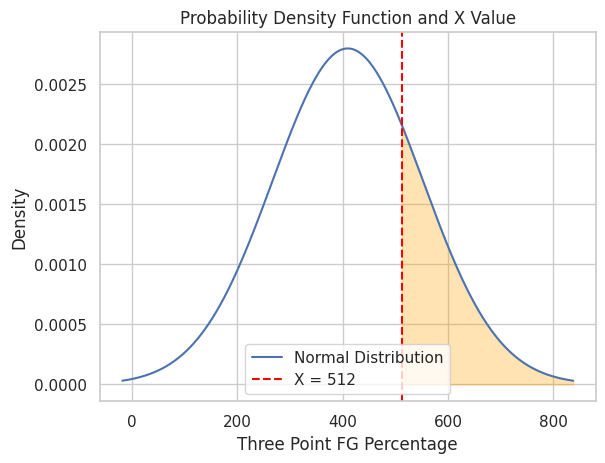

In [193]:
mean = new_key_metrics["Total_Points"].mean()
std = new_key_metrics["Total_Points"].std()
X = 512
prob0 = scipy.stats.norm.cdf((X - mean)/std)
print(mean)
print((1 - prob0) * 100)


# Create a range of values based on the distribution
x = np.linspace(mean - 3*std, mean + 3*std, 1000)
plt.plot(x, scipy.stats.norm.pdf(x, mean, std), label='Normal Distribution')

# Highlight the X value in the distribution
plt.axvline(x=X, color='red', linestyle='--', label='X = 512')

# Shade the area below X to represent the probability
plt.fill_between(x, scipy.stats.norm.pdf(x, mean, std), where=(x >= X), color='orange', alpha=0.3)

# Labels and title
plt.xlabel('Three Point FG Percentage')
plt.ylabel('Density')
plt.title('Probability Density Function and X Value')
plt.legend()
plt.grid(True)
plt.show()

In [178]:
mean = new_key_metrics["Blocks"].mean()
std = new_key_metrics["Blocks"].std()
X = 21
prob0 = scipy.stats.norm.cdf((X - mean)/std)
print((1 - prob0) * 100)


50.951520694203964


In [179]:
mean = new_key_metrics["Steals"].mean()
std = new_key_metrics["Steals"].std()
X = 29
prob0 = scipy.stats.norm.cdf((X - mean)/std)
print((1 - prob0) * 100)


52.993182779075255


In [180]:
mean = new_key_metrics["Total_Rebounds"].mean()
std = new_key_metrics["Total_Rebounds"].std()
X = 204
prob0 = scipy.stats.norm.cdf((X - mean)/std)
print((1 - prob0) * 100)


32.92793139212786


In [181]:
mean = new_key_metrics["Assists"].mean()
std = new_key_metrics["Assists"].std()
X = 71
prob0 = scipy.stats.norm.cdf((X - mean)/std)
print((1 - prob0) * 100)


47.52199502458517


In [182]:
mean = new_key_metrics["Field_Goal_Percentage"].mean()
std = new_key_metrics["Field_Goal_Percentage"].std()
X = 45.5
prob0 = scipy.stats.norm.cdf((X - mean)/std)
print((1 - prob0) * 100)


57.902940127621626


3.699300966736574


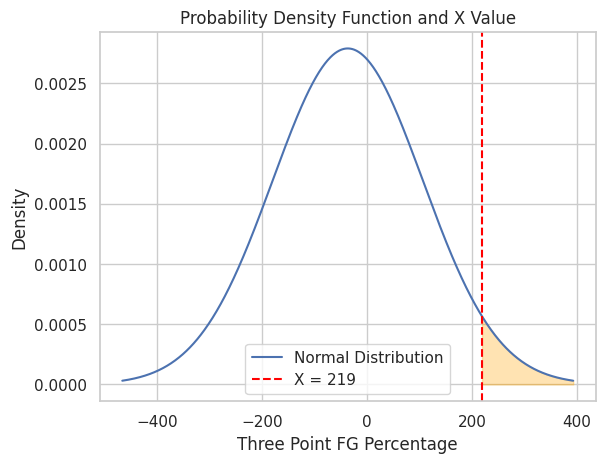

In [189]:
mean = new_key_metrics["Plus_Minus"].mean()
std = new_key_metrics["Plus_Minus"].std()
X = 219
prob0 = scipy.stats.norm.cdf((X - mean)/std)
print((1 - prob0) * 100)

# Create a range of values based on the distribution
x = np.linspace(mean - 3*std, mean + 3*std, 1000)
plt.plot(x, scipy.stats.norm.pdf(x, mean, std), label='Normal Distribution')

# Highlight the X value in the distribution
plt.axvline(x=X, color='red', linestyle='--', label='X = 219')

# Shade the area below X to represent the probability
plt.fill_between(x, scipy.stats.norm.pdf(x, mean, std), where=(x >= X), color='orange', alpha=0.3)

# Labels and title
plt.xlabel('Three Point FG Percentage')
plt.ylabel('Density')
plt.title('Probability Density Function and X Value')
plt.legend()
plt.grid(True)
plt.show()

10.052471371191917


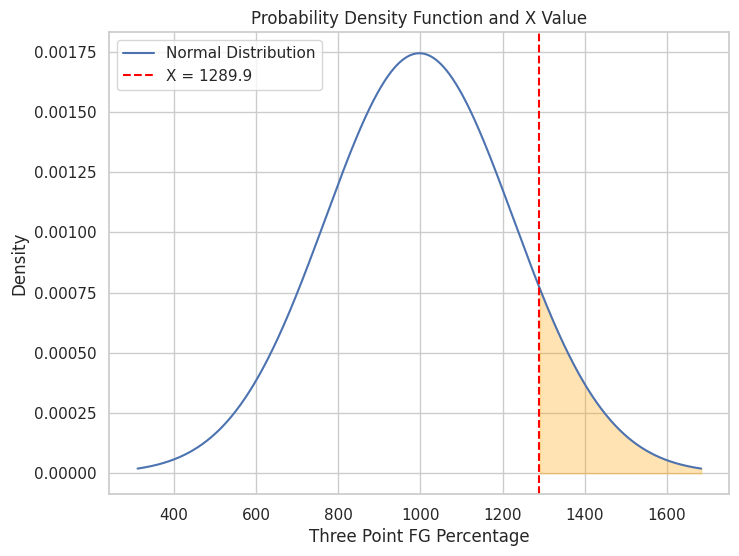

In [195]:
mean = new_df["Minutes_Played"].mean()
std = new_df["Minutes_Played"].std()
X = 1289.9
prob0 = scipy.stats.norm.cdf((X - mean)/std)
print((1 - prob0) * 100)




# Create a plot for the normal distribution
plt.figure(figsize=(8, 6))

# Create a range of values based on the distribution
x = np.linspace(mean - 3*std, mean + 3*std, 1000)
plt.plot(x, scipy.stats.norm.pdf(x, mean, std), label='Normal Distribution')

# Highlight the X value in the distribution
plt.axvline(x=X, color='red', linestyle='--', label='X = 1289.9')

# Shade the area below X to represent the probability
plt.fill_between(x, scipy.stats.norm.pdf(x, mean, std), where=(x >= X), color='orange', alpha=0.3)

# Labels and title
plt.xlabel('Three Point FG Percentage')
plt.ylabel('Density')
plt.title('Probability Density Function and X Value')
plt.legend()
plt.grid(True)
plt.show()


33.024
33.75447638716737


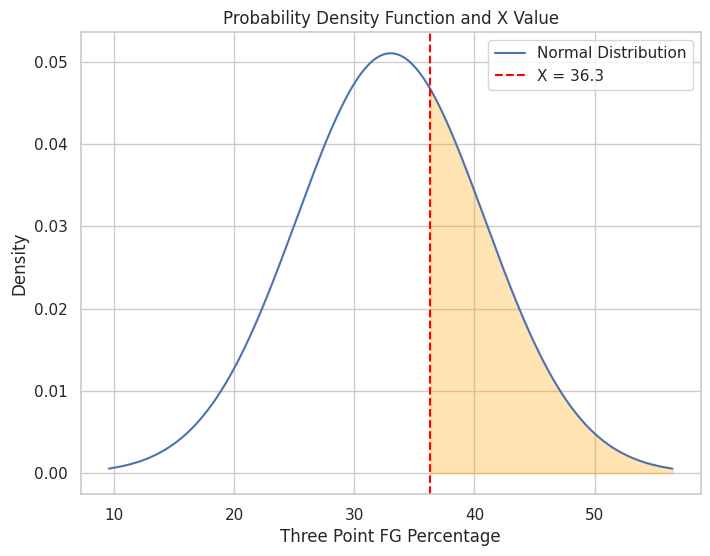

In [191]:
mean = new_df["Three_Point_FG_Percentage"].mean()
std = new_df["Three_Point_FG_Percentage"].std()
X = 36.3
prob0 = scipy.stats.norm.cdf((X - mean)/std)
print(mean)
print((1 - prob0) * 100)



# Create a plot for the normal distribution
plt.figure(figsize=(8, 6))

# Create a range of values based on the distribution
x = np.linspace(mean - 3*std, mean + 3*std, 1000)
plt.plot(x, scipy.stats.norm.pdf(x, mean, std), label='Normal Distribution')

# Highlight the X value in the distribution
plt.axvline(x=X, color='red', linestyle='--', label='X = 36.3')

# Shade the area below X to represent the probability
plt.fill_between(x, scipy.stats.norm.pdf(x, mean, std), where=(x >= X), color='orange', alpha=0.3)

# Labels and title
plt.xlabel('Three Point FG Percentage')
plt.ylabel('Density')
plt.title('Probability Density Function and X Value')
plt.legend()
plt.grid(True)
plt.show()